In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/holo_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/dirac_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/trithep_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/reduced_rmg_spinors.jl")

r_rmg_decoupled_bc (generic function with 1 method)

In [2]:
Makie.to_font("Times New Roman")

FTFont (family = Times New Roman, style = Regular)

<font size="12">Parameters</font>

In [3]:
# general parameters
pd = 50
kappa = 1
m_kappa = 10^(-1) * kappa
w = 10^(-1) * m_kappa

0.010000000000000002

In [4]:
# 3-Patch parameters
vF = 0
delta = -1

-1

In [5]:
# RMG parameters
a = 4*pi/(3*kappa)
uD = 10
t0 = 3
t1 = 5
t2 = -0.21
t3 = 0
t4 = 0
Nl = 3
index = 1

1

In [6]:
# Dirac parameters
v = 1
m = -0.5

-0.5

In [7]:
# Trithep parameters
B = -2

-2

In [8]:
# Reduced RMG parameters
u = 10
v_F = 2
t = 5
n_l = 3

3

In [9]:
function origin_bc_of_alpha(Nl, m_kappa, vF, delta, alpha_mag, w, pd, a, uD, t0, t1, t2, t3, t4, index, v, m, B, v_F, u, t, n_l)
    spinor_labels = ["Holomorphic", "RMG", "Dirac", "MBI"]
    berry_labels = ["3-Patch", "Patch", "Weighted Sum"]
    alpha_list = alpha_mag * exp.(im * range(-pi, pi, 10^3))

    # dims = (# spinors, 5 kinds of BC, length alpha_list)
    curvatures = Array{Float64}(undef, length(spinor_labels), length(berry_labels), length(alpha_list))

    analytic_origin_list = Array{Float64}(undef, length(alpha_list))

    # Origin parameters
    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    spacing = 10^(-2) * (w / 2 / pd)

    # create plot
    P = Figure(size=(3500, 2000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:length(alpha_list)
        alpha = alpha_list[i]

        
        # holomorphic spinors
        curvatures[1, 1, i] = holo_patch_bc(grid, spacing, Nl, m_kappa, vF, delta, alpha)[1]
        curvatures[1, 2, i] = curvatures[1, 1, i] - holo_weighted_sum_bc(grid, spacing, Nl, m_kappa, vF, delta, alpha)[1]
        # curvatures[1, 2, i] = holo_decoupled_bc(grid, spacing, Nl, m_kappa, vF, delta, alpha)[1]
        curvatures[1, 3, i] = holo_weighted_sum_bc(grid, spacing, Nl, m_kappa, vF, delta, alpha)[1]
        # curvatures[1, 4, i] = 
        # curvatures[1, 5, i] = 

        # RMG spinors
        curvatures[2, 1, i] = rmg_patch_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)[1]
        curvatures[2, 2, i] = curvatures[2, 1, i] - rmg_weighted_sum_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)[1]
        curvatures[2, 3, i] = rmg_weighted_sum_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, m_kappa, vF, delta, alpha)[1]
        # curvatures[2, 4, i] = 
        # curvatures[2, 5, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]

        # Dirac spinors
        curvatures[3, 1, i] = dirac_patch_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
        curvatures[3, 2, i] = curvatures[3, 1, i] - dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
        curvatures[3, 3, i] = dirac_weighted_sum_bc(grid, spacing, v, m, index, m_kappa, vF, delta, alpha)[1]
        # curvatures[3, 4, i] = 
        # curvatures[3, 5, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]

        # Trithep spinors
        curvatures[4, 1, i] = mbi_patch_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
        curvatures[4, 2, i] = curvatures[4, 1, i] - mbi_weighted_sum_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
        curvatures[4, 3, i] =  mbi_weighted_sum_bc(grid, spacing, B, m_kappa, vF, delta, alpha)[1]
        # curvatures[4, 4, i] = 
        # curvatures[4, 5, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]

        # analytic_origin_list[i] = analytic_origin_3p(alpha, delta)

        # Reduced RMG spinors
        # curvatures[5, 1, i] = r_rmg_patch_bc(grid, spacing, v_F, u, t, n_l, index, m_kappa, vF, delta, alpha)[1]
        # curvatures[5, 2, i] = r_rmg_decoupled_bc(grid, spacing, v_F, u, t, n_l, index, m_kappa, vF, delta, alpha)[1]
        # curvatures[5, 3, i] = curvatures[5, 1, i] - curvatures[5, 2, i]
        # curvatures[5, 4, i] = r_rmg_weighted_sum_bc(grid, spacing, v_F, u, t, n_l, index, m_kappa, vF, delta, alpha)[1]
        # curvatures[5, 5, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
    end

    for j in 1:size(curvatures, 1)
        major_ax1 = Axis(P[:, j], title = spinor_labels[j], titlegap = 70, titlefont = :weird, titlesize = 50)
        hidedecorations!(major_ax1, label = false)
        hidespines!(major_ax1)
        for i in 1:size(curvatures, 2)
            ax1 = Axis(P[i, j], xlabel = L"arg(\alpha)", ylabel = L"\Omega(0, 0)", title = berry_labels[i], titlefont = :regular, titlegap = 20)
            lines!(ax1, angle.(alpha_list), curvatures[j, i, :])
            lines!(ax1, 5/6 .* ones(10^3), curvatures[j, i, :])
        end
    end
    # big_ax = Axis(P[:, :], title = "Numerical 3-Patch Comps", titlegap = 180, titlefont = :weird, titlesize = 80)
    # hidedecorations!(big_ax, label = false)
    # hidespines!(big_ax)

    # ax1 = Axis(P[size(curvatures, 1) + 2, 1], xlabel = L"arg(\alpha)", ylabel = L"\Omega(0, 0)", title = "analytic", titlefont = :regular, titlegap = 20)
    # lines!(ax1, angle.(alpha_list), analytic_origin_list)
    P
end

origin_bc_of_alpha (generic function with 1 method)

<font size="12">Large alpha</font>

In [10]:
alpha_mag = 10^3

1000

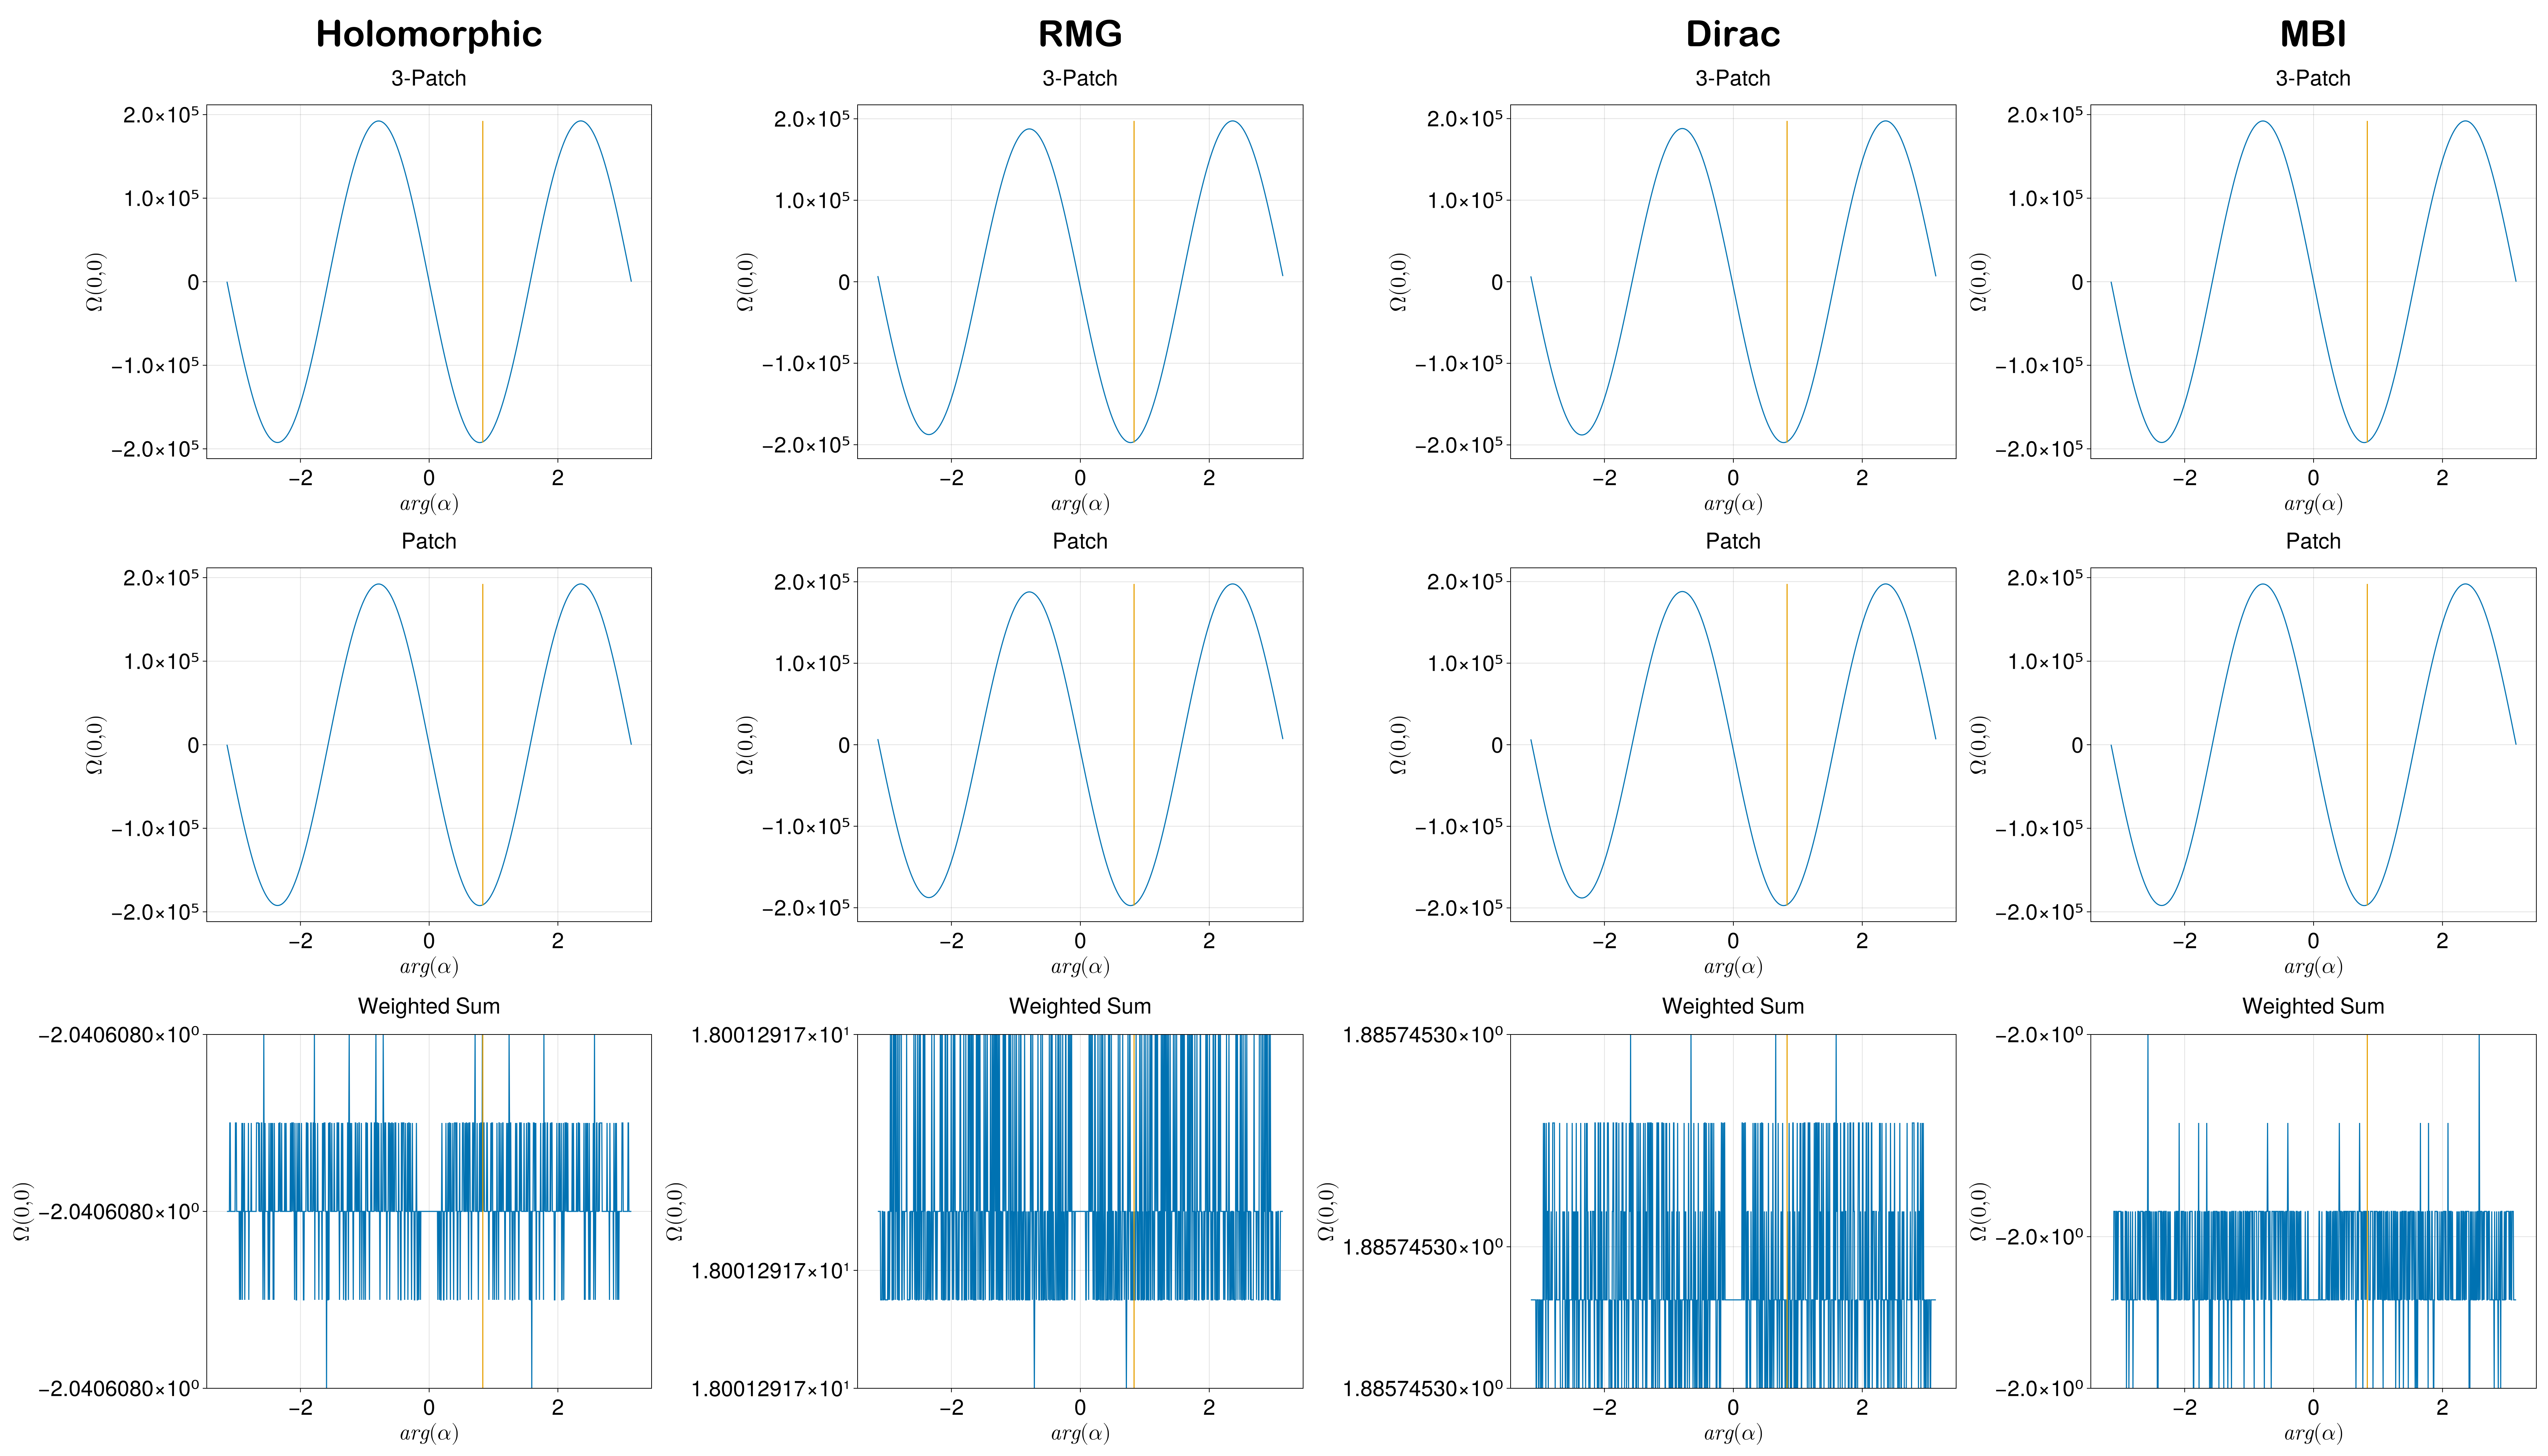

In [11]:
origin_bc_of_alpha(Nl, m_kappa, vF, delta, alpha_mag, w, pd, a, uD, t0, t1, t2, t3, t4, index, v, m, B, v_F, u, t, n_l)

<font size="12">Medium alpha</font>

In [12]:
alpha_mag = 4

4

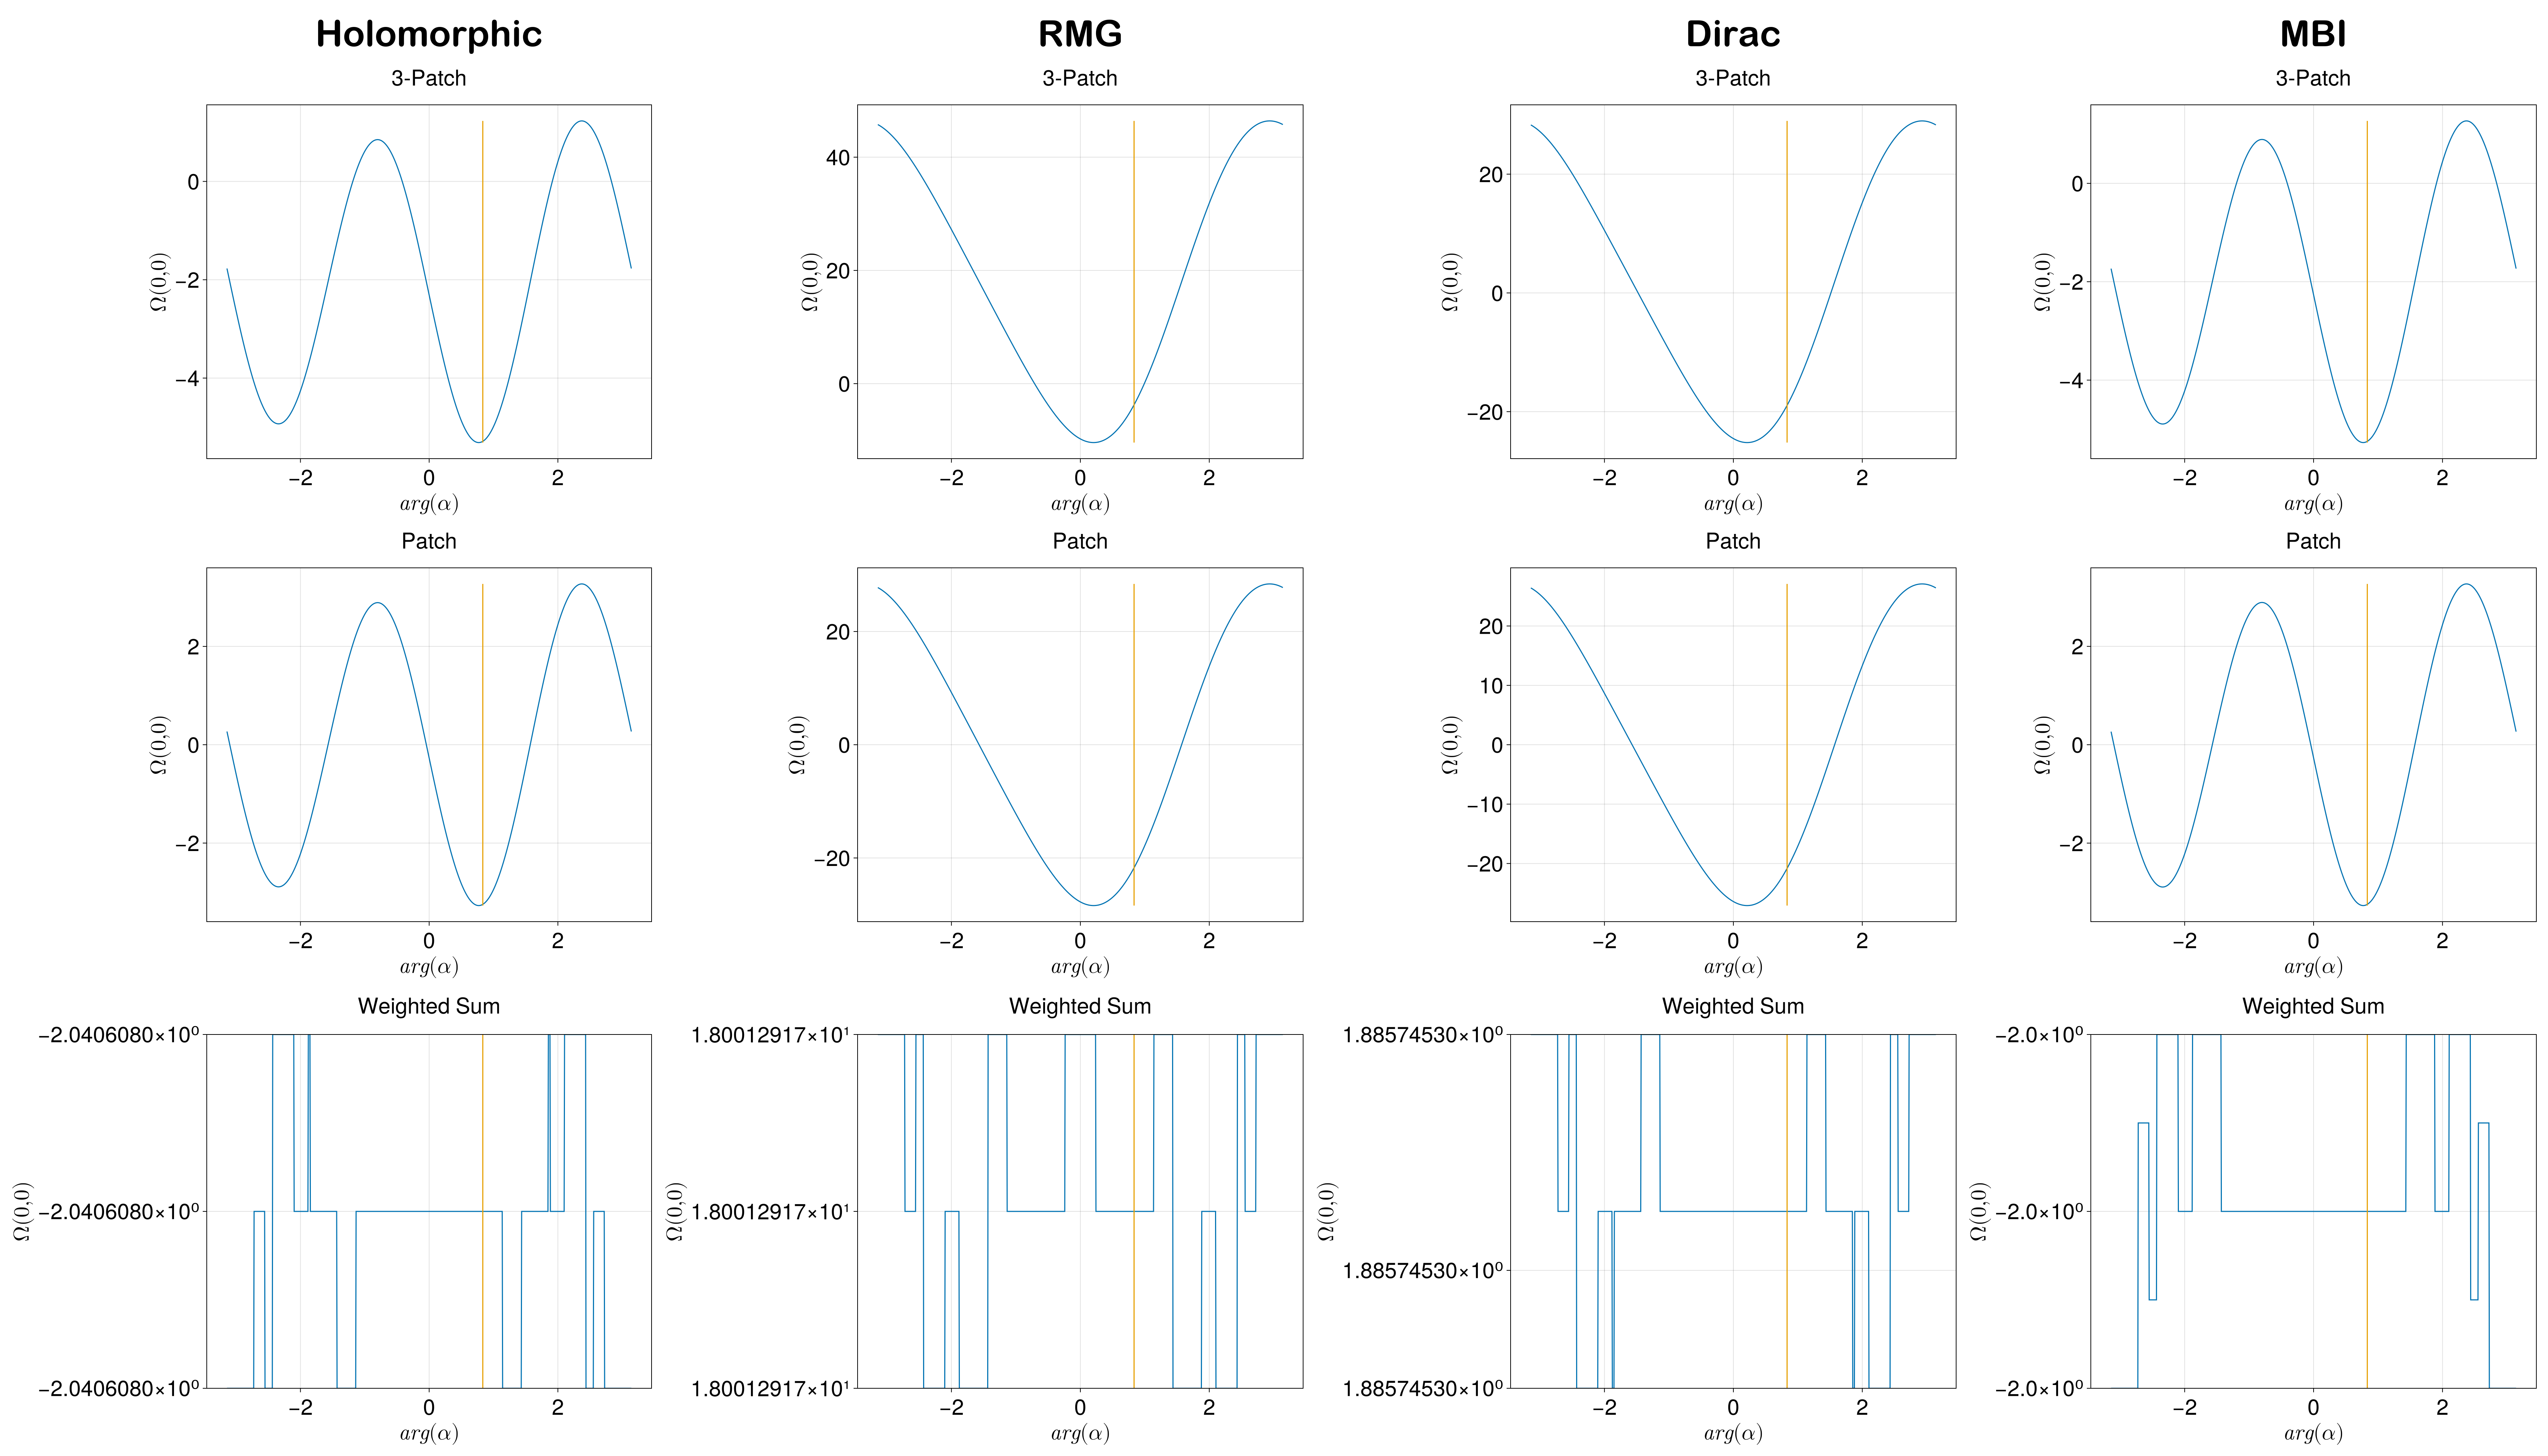

In [13]:
origin_bc_of_alpha(Nl, m_kappa, vF, delta, alpha_mag, w, pd, a, uD, t0, t1, t2, t3, t4, index, v, m, B, v_F, u, t, n_l)

<font size="12">Small alpha</font>

In [14]:
alpha_mag = 10^(-1)

0.1

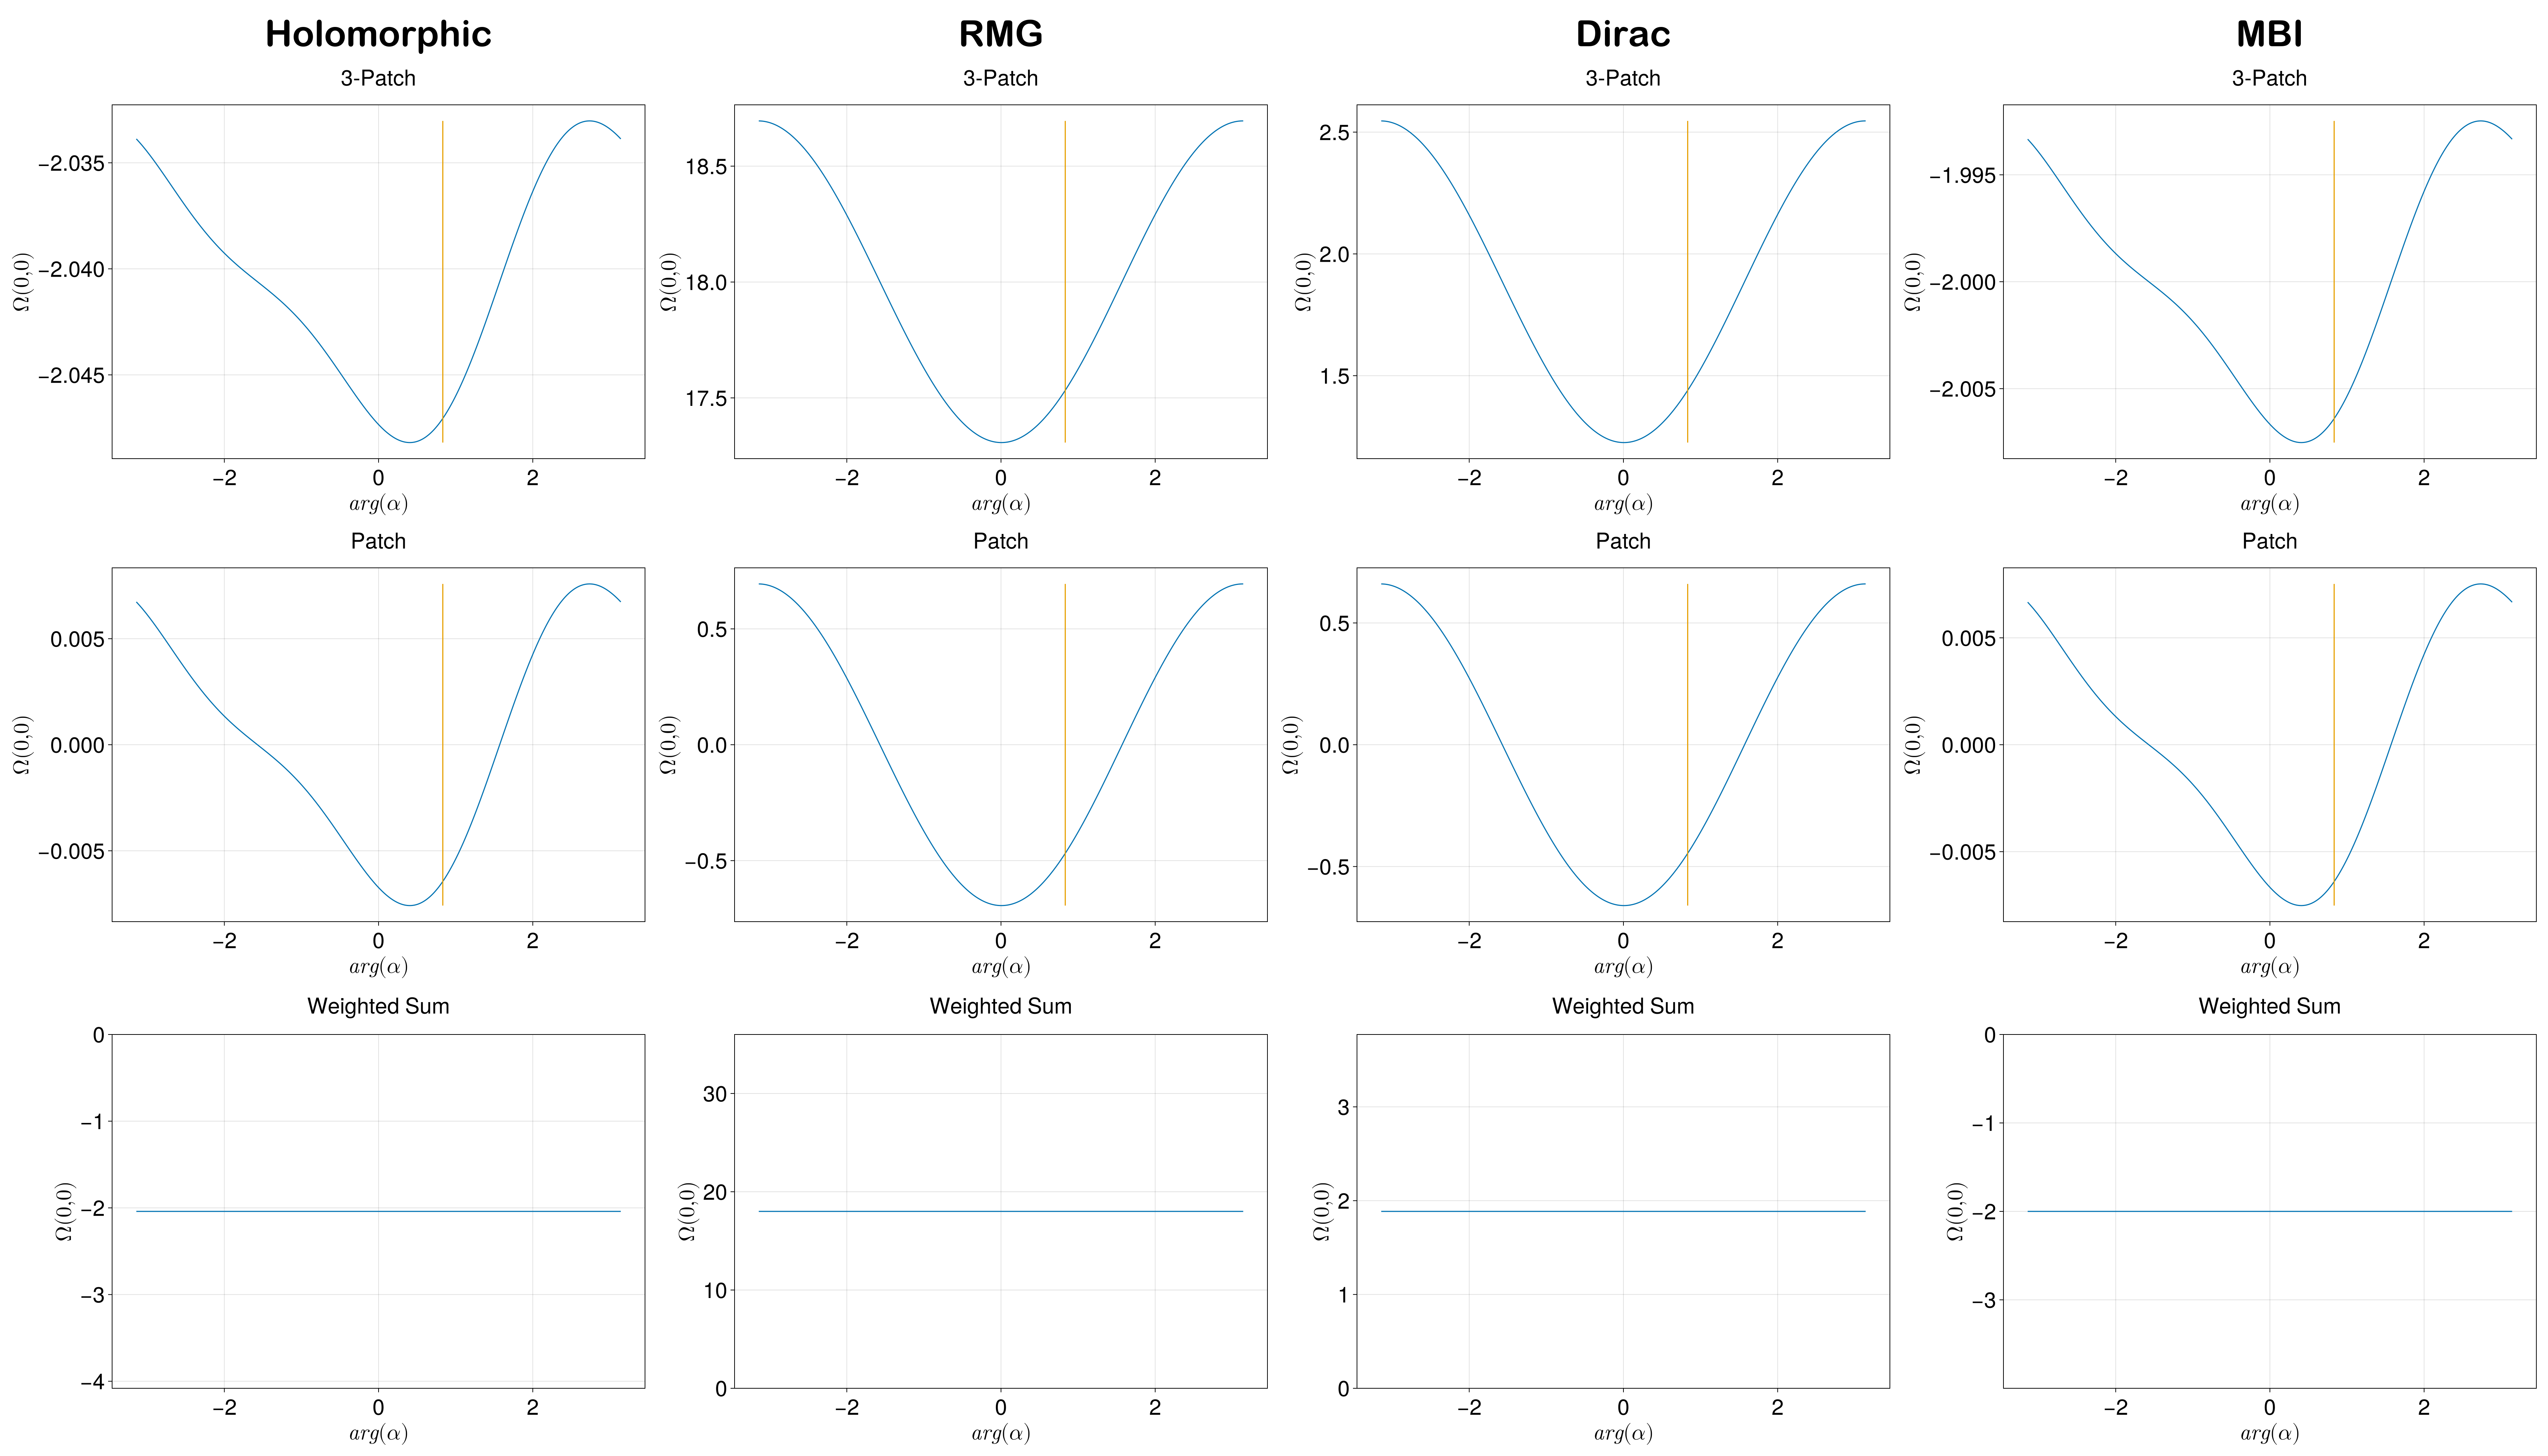

In [15]:
origin_bc_of_alpha(Nl, m_kappa, vF, delta, alpha_mag, w, pd, a, uD, t0, t1, t2, t3, t4, index, v, m, B, v_F, u, t, n_l)

<font size="12">Spacing Convergence</font>

In [16]:
function patch_bc_spacing(delta, vF, w, pd)
    # not really worried about convergance as a function of arg(\alpha)
    alpha_mags = [10^0, 10^1, 10^2, 10^3, 10^4]
    temp_list = range(-1, 4, 10^3)
    spacing_list = 10 .^(temp_list)

    curvatures = Array{Float64}(undef, length(alpha_mags), length(spacing_list))

    P = Figure(size=(2500, 2400), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for j in 1:length(alpha_mags)
        alpha = alpha_mags[j] * exp(im * pi/3)
        for i in 1:length(spacing_list)
            spacing = (w / 2 / pd) / spacing_list[i]

            x = 10^(-16)
            y = 10^(-16)
            grid = reshape([x, y], (1, 2))

            curvatures[j, i] = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
        end
        ax1 = Axis(P[j, 1], title = string(alpha_mags[j]), xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega(0, 0)")
        lines!(ax1, temp_list, curvatures[j, :])
    end

    big_ax = Axis(P[:, 1], title = L"\text{\Omega(0, 0) as a function of } \frac{1}{spacing}", titlegap = 60, titlefont = :weird, titlesize = 80)
    hidedecorations!(big_ax, label = false)
    hidespines!(big_ax)
    P
end

patch_bc_spacing (generic function with 1 method)

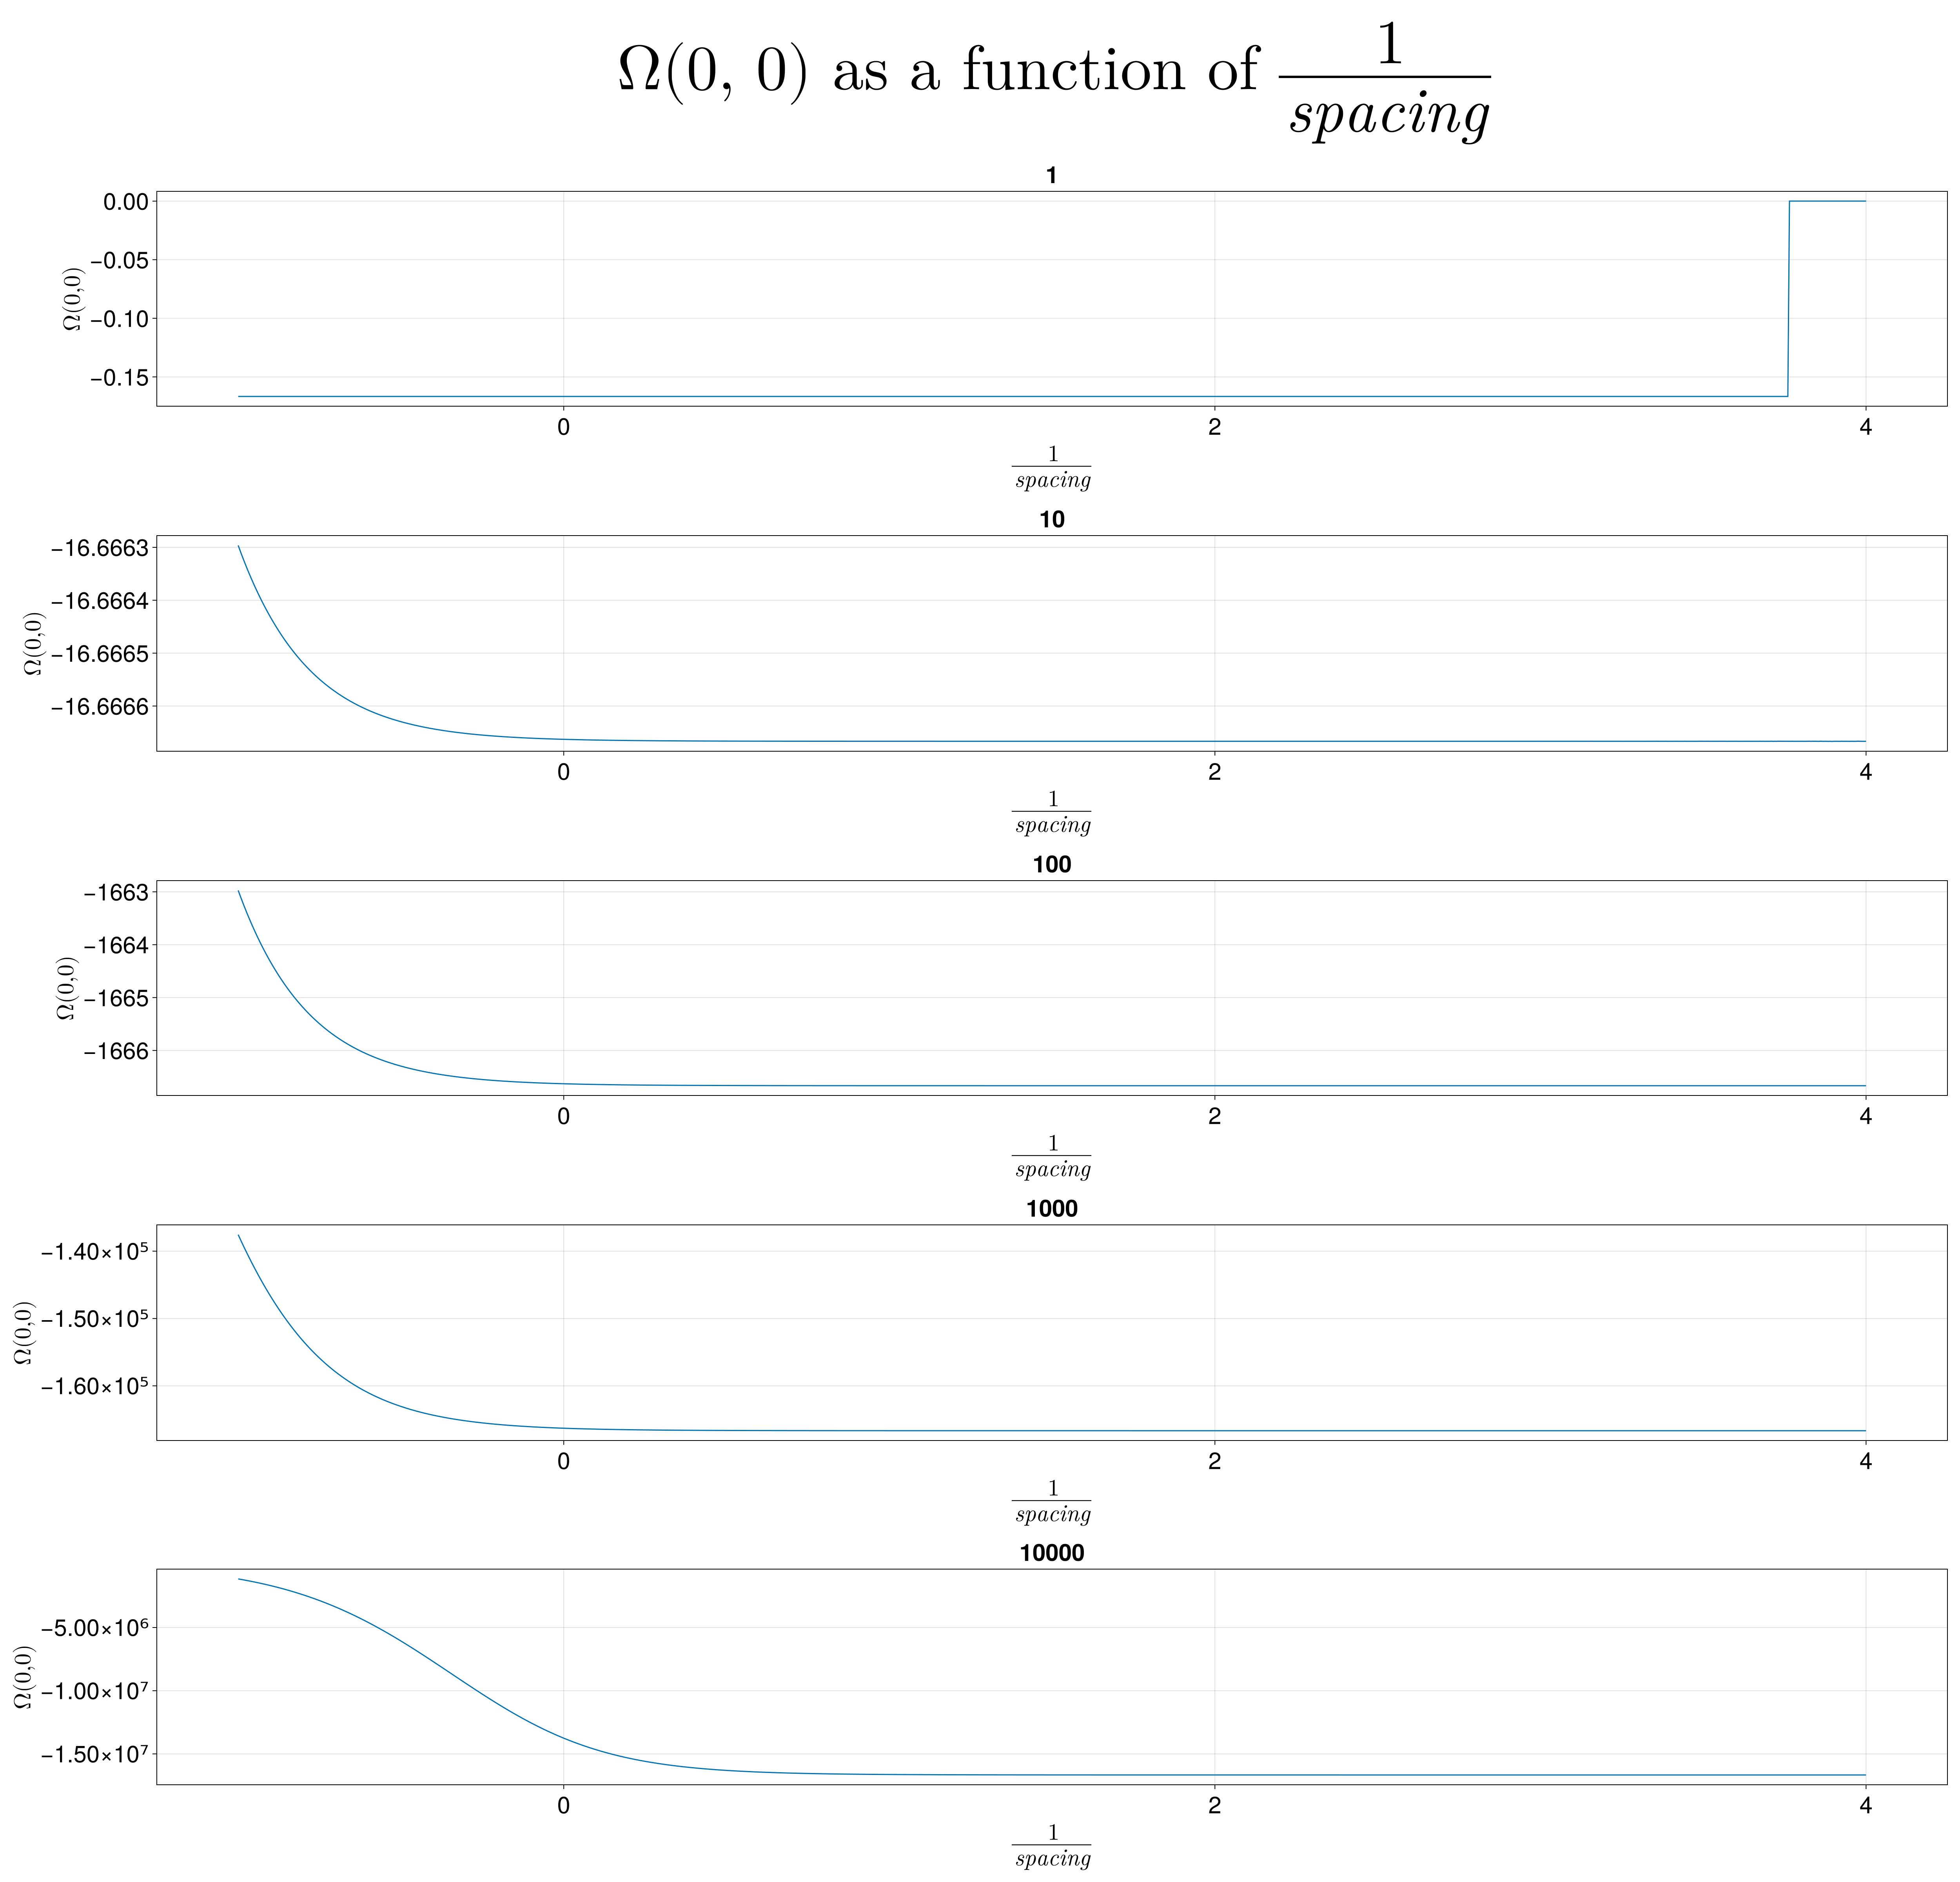

In [17]:
patch_bc_spacing(delta, vF, w, pd)

<font size="12">Analytic Accuracy</font>

In [18]:
function analytic_comp(vF, delta, w, pd)
    alpha_ang_list = exp.(im * range(-pi, pi, 10^3))
    alpha_mag_list = range(0, 4, 10^3)

    angles = exp.(im * [-2*pi/3, -pi/3, pi/3, 2*pi/3])
    magnitudes = rand(10^minimum(alpha_mag_list):10^maximum(alpha_mag_list), 4)

    angle_curvatures = Array{Float64}(undef, length(magnitudes), length(alpha_ang_list))
    mag_curvatures = Array{Float64}(undef, length(angles), length(alpha_mag_list))

    # Origin parameters
    x = 10^(-16)
    y = 10^(-16)
    grid = reshape([x, y], (1, 2))
    spacing = 10^(-2) * (w / 2 / pd)
    

    # create plot
    P = Figure(size=(3500, 2000), fontsize=30, fonts = (; regular = "italic", weird = "bold"))

    for i in 1:length(angles)
        for j in 1:length(alpha_mag_list)
            alpha = 10^alpha_mag_list[j] * angles[i]
            if analytic_origin_3p(alpha, delta) != 0
                mag_curvatures[i, j] = abs((bc_no_spinors(grid, spacing, vF, delta, alpha)[1] - analytic_origin_3p(alpha, delta)) / analytic_origin_3p(alpha, delta))
            else
                mag_curvatures[i, j] = 0
            end
        end
        ax1 = Axis(P[i, 1], xlabel = L"log_{10}|\alpha|", ylabel = L"\Omega(0, 0)", title = string(angle.(angles[i])/pi), titlefont = :regular, titlegap = 20)
        lines!(ax1, alpha_mag_list, mag_curvatures[i, :])
    end

    for i in 1:length(magnitudes)
        for j in 1:length(alpha_ang_list)
            alpha = alpha_ang_list[j] * magnitudes[i]
            if analytic_origin_3p(alpha, delta) != 0
                angle_curvatures[i, j] = abs((bc_no_spinors(grid, spacing, vF, delta, alpha)[1] - analytic_origin_3p(alpha, delta)) / analytic_origin_3p(alpha, delta))
            else
                angle_curvatures[i, j] = 0
            end
            println(analytic_origin_3p(alpha, delta))
            println(bc_no_spinors(grid, spacing, vF, delta, alpha)[1])
        end
        ax1 = Axis(P[i, 2], xlabel = L"arg(\alpha)", ylabel = L"\Omega(0, 0)", title = string(magnitudes[i]), titlefont = :regular, titlegap = 20)
        lines!(ax1, angle.(alpha_ang_list), angle_curvatures[i, :])
    end

    major_ax1 = Axis(P[:, 1], title = L"\Delta \Omega(0,0) \text{ as a function of } |\alpha|", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax1, label = false)
    hidespines!(major_ax1)

    major_ax2 = Axis(P[:, 2], title = L"\Delta \Omega(0,0) \text{ as a function of } arg(\alpha)", titlegap = 100, titlefont = :weird, titlesize = 50)
    hidedecorations!(major_ax2, label = false)
    hidespines!(major_ax2)

    big_ax = Axis(P[:, :], title = "Relative error between numeric 3P BC and analytic 3P BC at (0,0)", titlegap = 180, titlefont = :weird, titlesize = 80)
    hidedecorations!(big_ax, label = false)
    hidespines!(big_ax)
    
    P
end

analytic_comp (generic function with 1 method)

In [29]:
delta = 1 + 3 * im
vF = 0

0

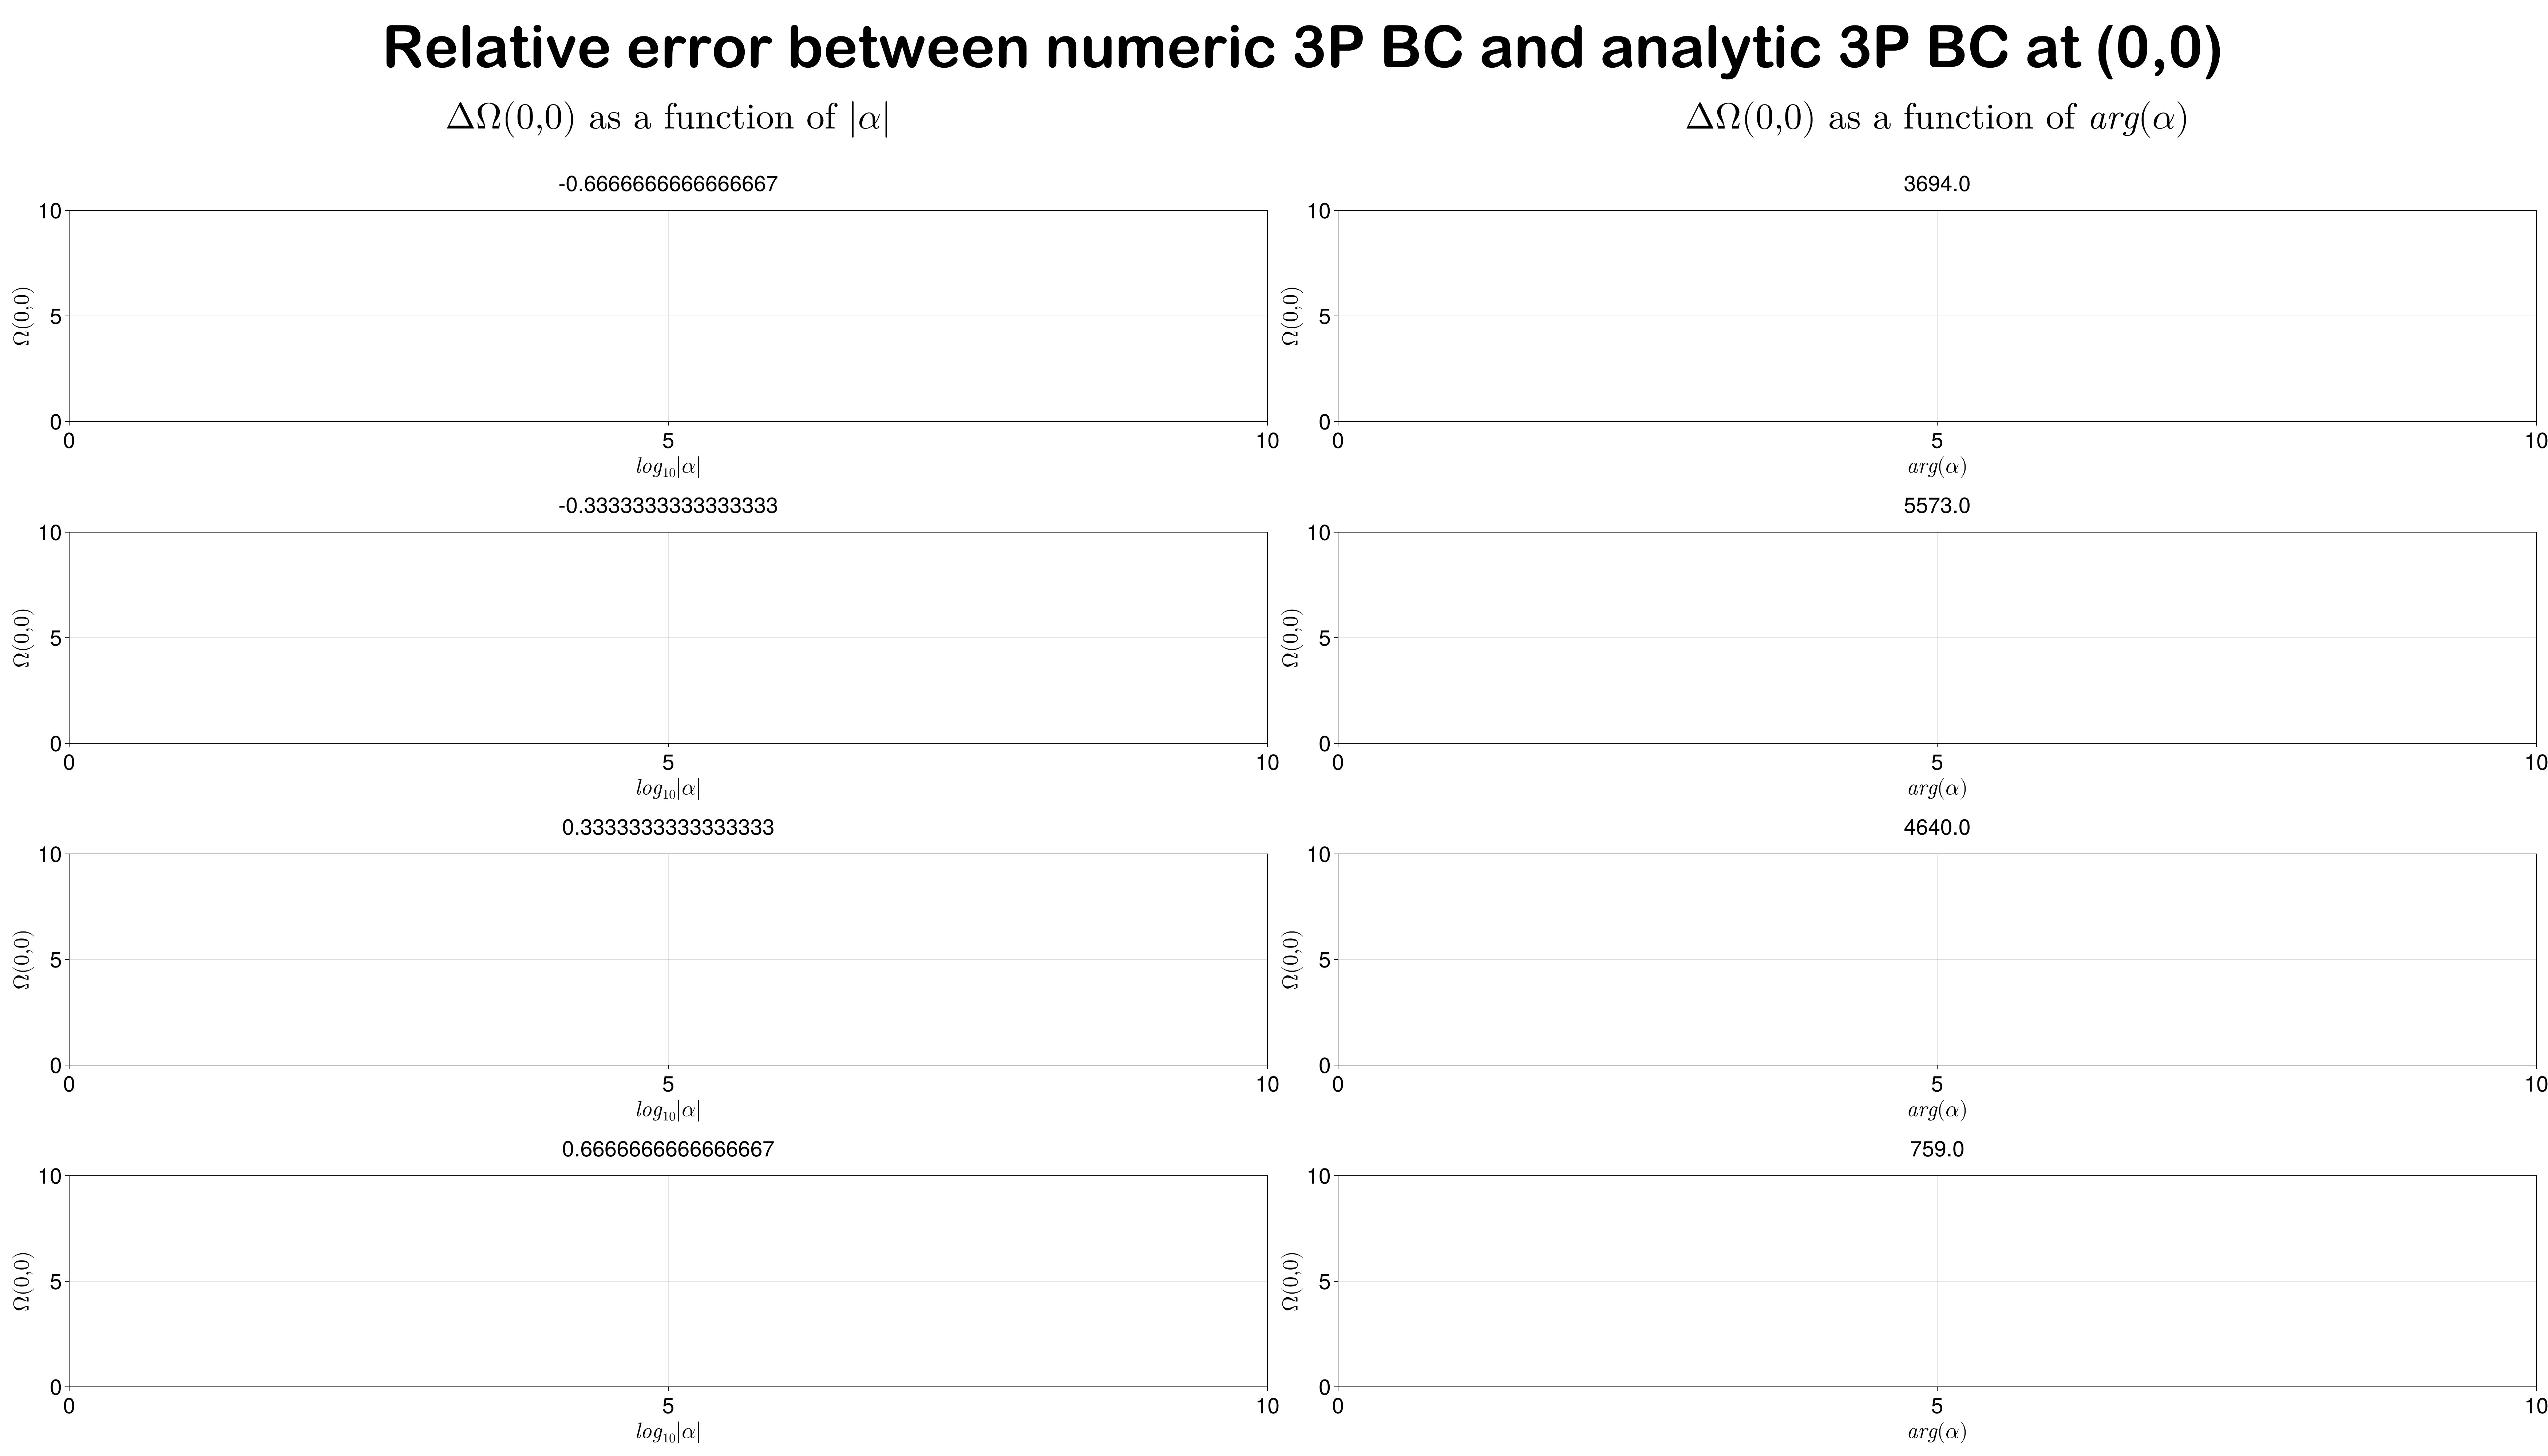

In [30]:
analytic_comp(vF, delta, w, pd)